In [23]:
from matplotlib import *
import matplotlib.pyplot as plt
import numpy as np
np.seterr(all='ignore')
rcParams['figure.figsize'] = (20, 10)

from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
from tushare import * #TUSHARE数据连接更新。
from rqalpha import * #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库

import time
import datetime #读取/设定数据库时间区域，当前股票，选股时间段。 

n1 = (time.strftime("20%y-%m-%d"))## 20yy-mm-dd格式，输出当日日期
print ("《设定测试》读取当日时间格式：n1",n1) #当日时间格式：yyyy-mm-dd
n2 = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
print ("《设定测试》读取当日时间格式：n2",n2) #当日时间格式：yyyymmdd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=2) 
    yesterday=today-oneday  
    return yesterday
n3 = (getYesterday())# 输出前二天日期
print ("《设定测试》读取前二日时间格式：n3",n3) #前日时间格式：yyyy-mm-dd
i = datetime.datetime.now()#当前日期

n4 = ("%s%s%s" % (i.year, i.month, i.day) )
print ("《设定测试》读取当日时间格式：n4",n4) #当日时间格式：yyyymmdd

n5 = ("%s" % i.isoformat() )
print ("《设定测试》读取当日时间格式：n5",n5) #当日时间格式：yyyy-mm-dd:...

n8="20180201"#开始时间
print ("《设定测试》手动设定选股开始时间格式：n8",n8)

n9="20180212"#结束时间
print ("《设定测试》手动设定选股结束时间格式：n9",n9)

def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=100) 
    yesterday=today-oneday  
    return yesterday
n10 = (getYesterday())# 输出前200天日期
#n10="20170101"#设定起始时间
print ("《设定测试》自动设定数据起始设定前推200天：n10",n10)

x1="000001.XSHG" #用rqalpha本地数据需要代码后缀！！！！XSHE=深圳，XSHG=上海
print ("《设定测试》设定股票代码",x1)
x2="300334.XSHE"
x3="600600.XSHG"
from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "rqalpha"  #设定数据库连接：rqalpha   tushare
if backend == "rqalpha":
    set_data_backend(RQAlphaDataBackend("~/.rqalpha/bundle"))
elif backend == "tushare":
    set_data_backend(TushareDataBackend())
set_start_date(n10)

S(x1)  # 设置当前关注股票
T(n9)   # 设置当前观察日期

print ("《数据测试》打印 开盘 最高 最低 收盘 成交量",O, H, L, C, V)  # 打印 Open High Low Close
print ("《数据测试》当天涨幅",C / C[1] - 1)  # 当天涨幅
print ("《数据测试》打印60日均线",MA(C, 60))  # 打印60日均线
print ("《数据测试》判断收盘价是否大于60日均线",C > MA(C, 60))  # 判断收盘价是否大于60日均线
print ("《数据测试》30日最高价",HHV(H, 30))  # 30日最高价
print ("《数据测试》最近30日，收盘价 Close 大于60日均线的天数",COUNT(C > MA(C, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("《数据测试》10日均线上穿",CROSS(MA(C, 10), MA(C, 20)))  # 10日均线上穿
print ("《数据测试》最近10天收阳线的天数",COUNT(C > O, 10))  # 最近10天收阳线的天数
print ("《数据测试》最近60天K线实体的最高价",HHV(MAX(O, C), 60))  # 最近60天K线实体的最高价
print ("《数据测试》5日均线上穿10日均线",CROSS(MA(C, 5), MA(C, 10)))  # 5日均线上穿10日均线

《设定测试》读取当日时间格式：n1 2018-02-14
《设定测试》读取当日时间格式：n2 20180214
《设定测试》读取前二日时间格式：n3 2018-02-12
《设定测试》读取当日时间格式：n4 2018214
《设定测试》读取当日时间格式：n5 2018-02-14T06:45:59.272614
《设定测试》手动设定选股开始时间格式：n8 20180201
《设定测试》手动设定选股结束时间格式：n9 20180212
《设定测试》自动设定数据起始设定前推200天：n10 2017-11-06
《设定测试》设定股票代码 000001.XSHG
《数据测试》打印 开盘 最高 最低 收盘 成交量 3128.37 3168.13 3113.61 3154.13 15331083100.0
《数据测试》当天涨幅 0.007757560266466568
《数据测试》打印60日均线 3368.2258333333325
《数据测试》判断收盘价是否大于60日均线 False
《数据测试》30日最高价 3587.03
《数据测试》最近30日，收盘价 Close 大于60日均线的天数 24
《数据测试》10日均线上穿 False
《数据测试》最近10天收阳线的天数 4
《数据测试》最近60天K线实体的最高价 3563.64
《数据测试》5日均线上穿10日均线 False


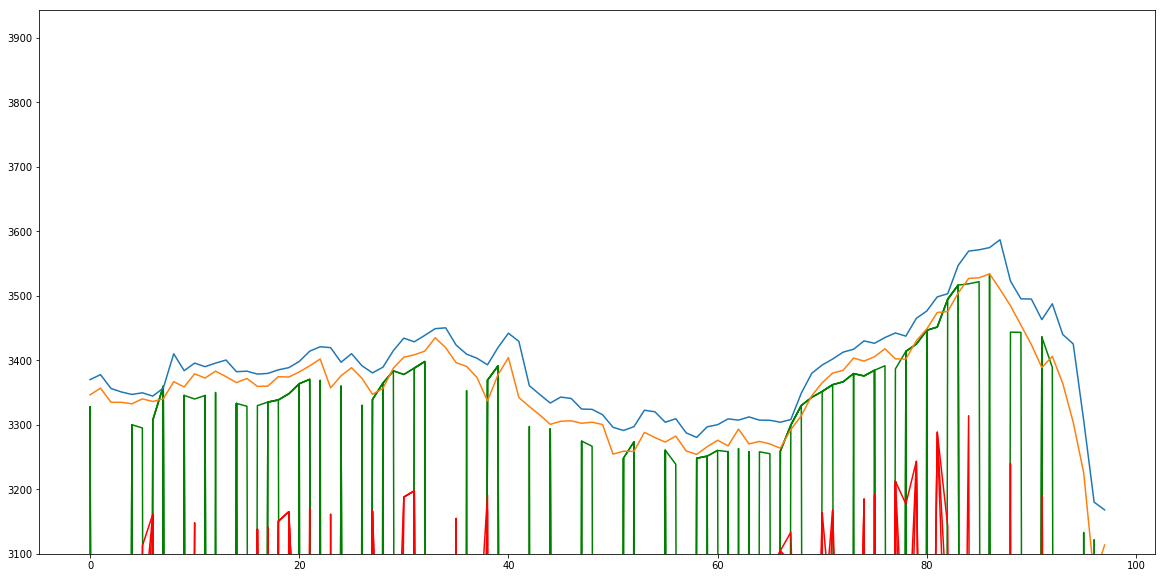

In [30]:
#CCI指标 方差函数模块
def AVEDEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)
    
    return sum_/N

M1=2
M2=3
TYP = (H+L+O+C)/4
TYP1 = (H*V+L*V+O*V+C*V)/4
TYP2 = (H+L)/2
TYP3 = (O+C)/2

CCI1 = (TYP-MA(TYP,M1))/(1.015*AVEDEV(TYP,M1))*H
CCI2 = (TYP1-MA(TYP1,M1))/(1.015*AVEDEV(TYP1,M1))*H
CCI3 = (TYP2-MA(TYP2,M1))/(1.015*AVEDEV(TYP2,M1))*H
CCI4 = (TYP3-MA(TYP3,M1))/(1.015*AVEDEV(TYP3,M1))*H
#CCI=(CCI1+CCI2+CCI3+CCI4)*(CCI1-CCI2-CCI3-CCI4)

CCC1 = (TYP-MA(TYP,M2))/(1.618*AVEDEV(TYP,M2))*H
CCC2 = (TYP1-MA(TYP1,M2))/(1.618*AVEDEV(TYP1,M2))*H
CCC3 = (TYP2-MA(TYP2,M2))/(1.618*AVEDEV(TYP2,M2))*H
CCC4 = (TYP3-MA(TYP3,M2))/(1.618*AVEDEV(TYP3,M2))*H
#CCC=(CCC1+CCC2+CCC3+CCC4)*(CCC1-CCC2-CCC3-CCC4)

ax = plt.subplot()
#buy_signal = CROSS((IF(CCC>1 and CCI>0,CCC,CCI)), 0) # and (IF(CCC>0,CCC,CCI))
#sell_signal = CROSS(CCC,CCI) and CROSS(MID,VL)
#ax.plot(TYP.series, label="TYP")

#ax.plot(CCI.series, label="CCI")

ax.plot(CCI1.series, label="CCI1",color="green")
ax.plot(CCI2.series, label="CCI2",color="green")
ax.plot(CCI3.series, label="CCI3",color="green")
ax.plot(CCI4.series, label="CCI4",color="green")

#ax.plot(CCC.series, label="CCC")

ax.plot(CCC1.series, label="CCC1",color="red")
ax.plot(CCC2.series, label="CCC2",color="red")
ax.plot(CCC3.series, label="CCC3",color="red")
ax.plot(CCC4.series, label="CCC4",color="red")

ax.plot(H.series, label="H")
ax.plot(L.series, label="L")
#ax.plot(O.series, label="O")
#ax.plot(C.series, label="C")
#ax.plot(VO.series, label="VO")
#ax.plot(VC.series, label="VC")
#ax.plot(MID.series, label="MID")
#ax.plot(UPPER.series, label="UPPER")
#ax.plot(LOWER.series, label="LOWER")
ax.set_xlim()
ax.set_ylim(3100)
#plt.plot(np.where(buy_signal.series)[0], CCI.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
#plt.plot(np.where(sell_signal.series)[0], CCC.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
#plt.legend(loc="best")
plt.show()

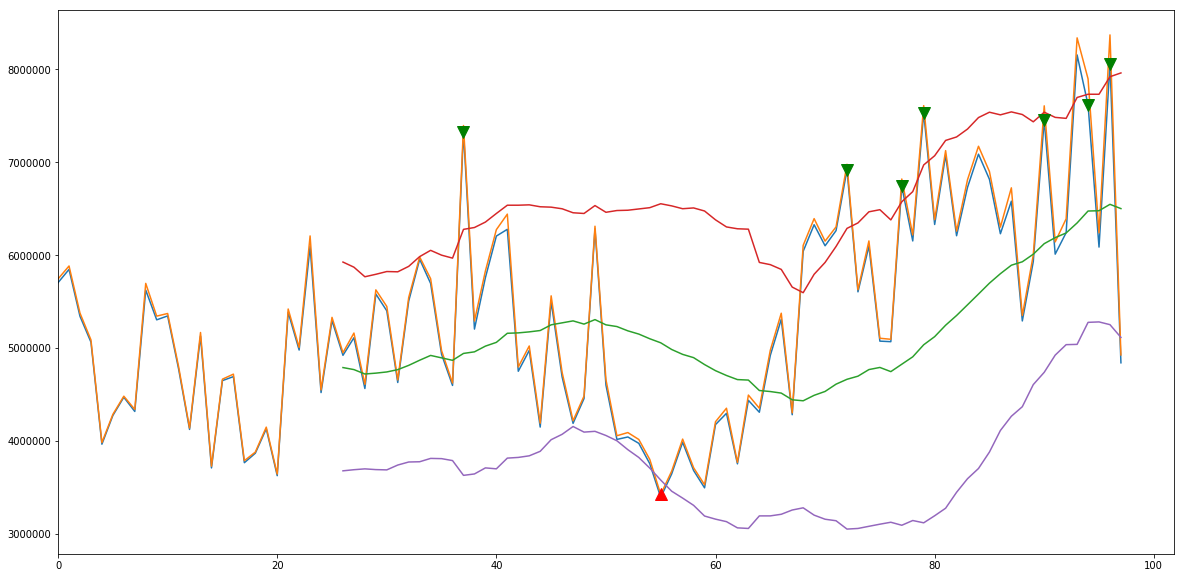

In [31]:
#N=20,P=2 BOLL 布林带
VH=V/(H)
VL=V/(L)
VO=V/(O)
VC=V/(C)
MID = MA((VH+VL)/2, 27)
UPPER = MID + STD(VL, 27) * 1.618
LOWER = MID - STD(VH, 27) * 1.618
ax = plt.subplot()
buy_signal = CROSS(VL, LOWER) # and CROSS(VL,MID)
sell_signal = CROSS(UPPER,VH) and CROSS(UPPER,VL)
ax.plot(VH.series, label="VH")
ax.plot(VL.series, label="VL")
#ax.plot(VO.series, label="VO")
#ax.plot(VC.series, label="VC")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], VL.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], VH.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
#plt.legend(loc="best")
plt.show()